# Statistical Magic
This notebook does some statistical operations to prove things like confidence intervals, standard errors and much more.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd



# Create some random data

In [11]:
# Create some random data points from a gaussian distribution
#Set random seed
np.random.seed(42)
mean = 100
std = 5
n = 10000
data = np.random.normal(mean, std, n)


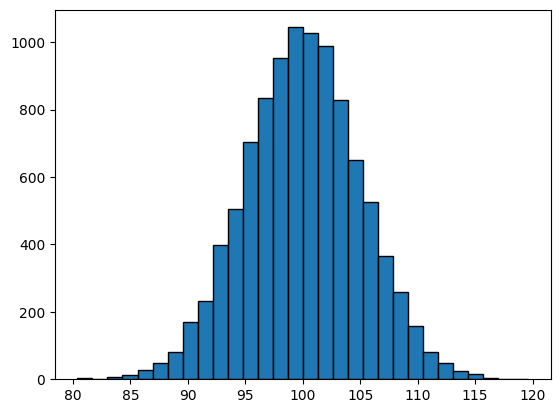

In [12]:
#plot
plt.hist(data, bins=30, edgecolor='black');

# Population statistics
Lets find out the actual population mean and standard deviation

In [25]:
population_mean = np.mean(data)
population_std = np.std(data)
print(f"Population mean: {population_mean}")
print(f"Population standard deviation: {population_std}")

Population mean: 99.98932008315786
Population standard deviation: 5.017061030649938


# Sample random points
Simulate an experiment to see what we get

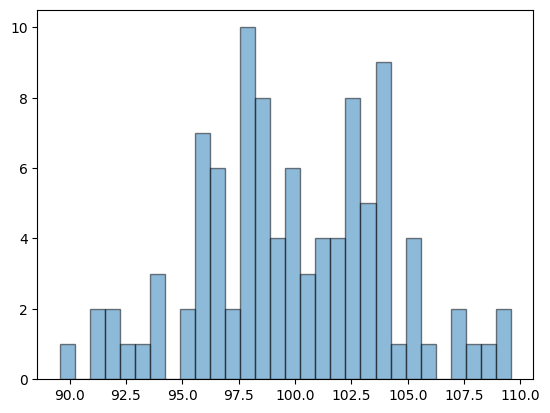

In [15]:
# Random sample
X = np.random.choice(data, 100, replace=False)

#Plot it
plt.hist(X, bins=30, edgecolor='black', alpha=0.5);

In [16]:
# Calculate sample mean and standard deviation
mean_sample = np.mean(X)
std_sample = np.std(X)
print(f'Mean: {mean_sample}, Standard deviation: {std_sample}')

Mean: 99.91165716452228, Standard deviation: 4.2291960636950545


# Confidence intervals
What is the confidence interval that we are say 95% sure that the actual mean is within some range?

In [17]:
# Calculate the standard error
se = std_sample/np.sqrt(len(X))
print(f'Standard error: {se}')

# Calculate the 95% confidence interval
ci = 1.96*se
print(f'Confidence interval: {ci}')

# Calculate the confidence interval
ci_low = mean_sample - ci
ci_high = mean_sample + ci
print(f'Confidence interval: [{ci_low}, {ci_high}]')
 

Standard error: 0.42291960636950543
Confidence interval: 0.8289224284842306
Confidence interval: [99.08273473603805, 100.74057959300652]


# Central limit theorem

Lets try the central limit theorem

1) The means of the samples in a set of samples will be approximately normally distributed
2) This normal distribution will have a mean close to the mean fo the population
3) The variance of the sample means will be close to the variance of the population divided by the sample size


Mean of sample means: 99.98823200260382, Standard deviation of sample means: 0.5002339856138521
Population mean: 99.98932008315786, Population standard deviation: 5.017061030649938


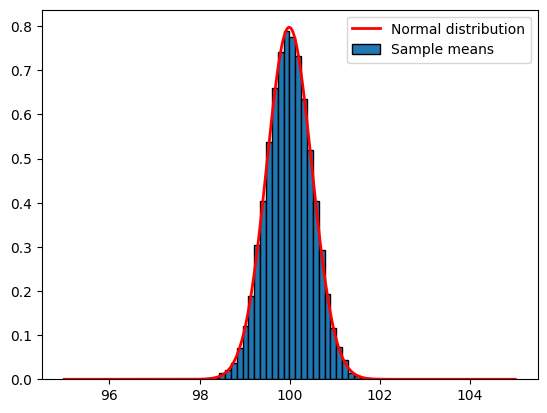

In [36]:
sample_size = 100
n_trials = 20000
sample_means = []
sample_stds = []
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X)
    sample_means.append(mean_sample)
    sample_stds.append(std_sample)


means_of_samples = np.mean(sample_means)
stds_of_samples = np.std(sample_means)
print(f'Mean of sample means: {means_of_samples}, Standard deviation of sample means: {stds_of_samples}')
print(f'Population mean: {population_mean}, Population standard deviation: {population_std}')
plt.hist(sample_means, bins=30, edgecolor='black', density=True);
x_norm = np.linspace(95, 105, 1000)
y_norm = (1/(stds_of_samples*np.sqrt(2*np.pi)))*np.exp(-0.5*((x_norm-means_of_samples)/stds_of_samples)**2)
plt.plot(x_norm, y_norm, 'r-', lw=2)

plt.legend(['Normal distribution', 'Sample means'])




In [24]:
#var_of_sample_means = var_real/sqrt(n)
#std_of_sample_means = sqrt(var_real)/sqrt(n)

standard_error = np.std(sample_means)/np.sqrt(sample_size)
estimated_std = 

print(f'True mean: {mean}, True standard deviation: {std}')
print(f'Calculated mean: {np.mean(sample_means)}, Calculated standard deviation (Standard Error): {standard_error}')

True mean: 100, True standard deviation: 5
Calculated mean: 100.00018426867449, Calculated standard deviation (Standard Error): 4.982432790140615
